Hello IRIS 

In [1]:
# Print all outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings('ignore')


from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

In [2]:
iris = load_iris()
iris.target[[10, 25, 50]]

list(iris.target_names)

array([0, 0, 1])

['setosa', 'versicolor', 'virginica']

# EDA

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

In [5]:
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

<Figure size 576x432 with 0 Axes>

Text(0.5, 0, 'Sepal length')

Text(0, 0.5, 'Sepal width')

(3.8, 8.4)

(1.5, 4.9)

([], [])

([], [])

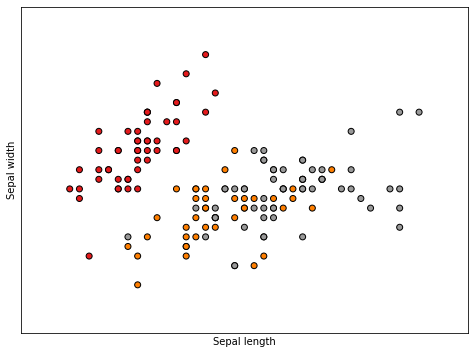

In [6]:
plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

Text(0.5, 0.92, 'First three PCA directions')

Text(0.5, 0, '1st eigenvector')

[Text(-4.0, 0, ''),
 Text(-3.0, 0, ''),
 Text(-2.0, 0, ''),
 Text(-1.0, 0, ''),
 Text(0.0, 0, ''),
 Text(1.0, 0, ''),
 Text(2.0, 0, ''),
 Text(3.0, 0, ''),
 Text(4.0, 0, ''),
 Text(5.0, 0, '')]

Text(0.5, 0, '2nd eigenvector')

[Text(-1.5, 0, ''),
 Text(-1.0, 0, ''),
 Text(-0.5, 0, ''),
 Text(0.0, 0, ''),
 Text(0.5, 0, ''),
 Text(1.0, 0, ''),
 Text(1.5, 0, ''),
 Text(2.0, 0, '')]

Text(0.5, 0, '3rd eigenvector')

[Text(-0.8, 0, ''),
 Text(-0.6000000000000001, 0, ''),
 Text(-0.4, 0, ''),
 Text(-0.19999999999999996, 0, ''),
 Text(0.0, 0, ''),
 Text(0.19999999999999996, 0, ''),
 Text(0.40000000000000013, 0, ''),
 Text(0.6000000000000001, 0, ''),
 Text(0.8, 0, ''),
 Text(1.0, 0, '')]

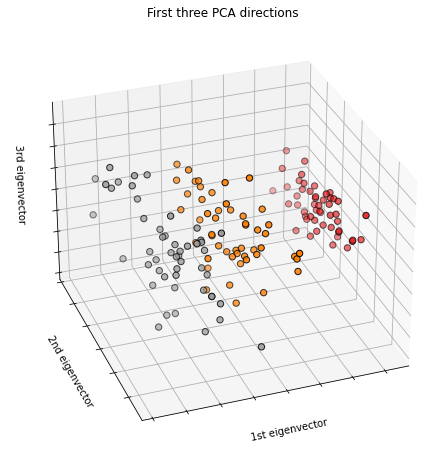

In [7]:
# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

# ML

In [8]:
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [9]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


In [11]:
df.nunique()

sepal length (cm)    35
sepal width (cm)     23
petal length (cm)    43
petal width (cm)     22
target                3
dtype: int64

In [12]:
df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [15]:
# pip install seaborn

<AxesSubplot:>

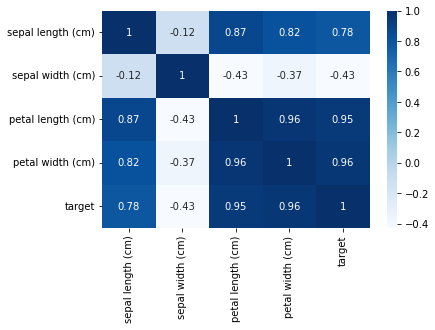

In [16]:
import seaborn as sb
corr = df.corr()
sb.heatmap(corr, cmap="Blues", annot=True)

Scatter Plot of all the attributes 


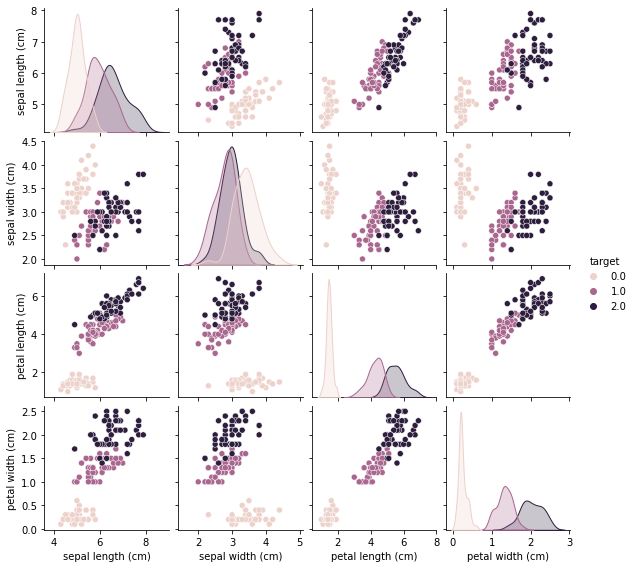

In [17]:
 print('Scatter Plot of all the attributes ')
sb.pairplot(df, hue = 'target', size = 2, diag_kind = 'kde')
plt.show()

Histograms of distribution of input attributes


array([[<AxesSubplot:title={'center':'sepal length (cm)'}>,
        <AxesSubplot:title={'center':'sepal width (cm)'}>],
       [<AxesSubplot:title={'center':'petal length (cm)'}>,
        <AxesSubplot:title={'center':'petal width (cm)'}>],
       [<AxesSubplot:title={'center':'target'}>, <AxesSubplot:>]],
      dtype=object)

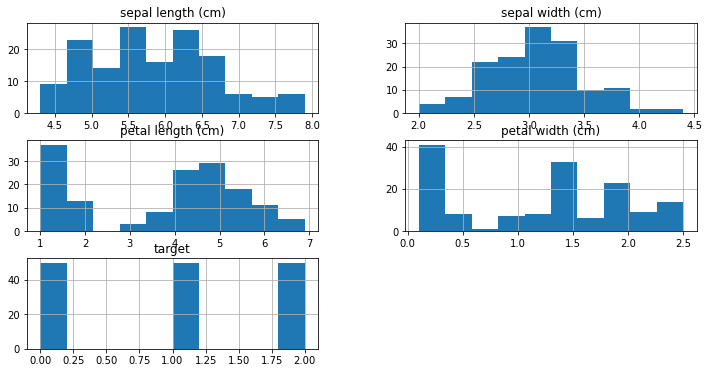

In [18]:
print('Histograms of distribution of input attributes')
df.hist()
his = plt.gcf()
his.set_size_inches(12, 6)
plt.show()

Box Plot - Distribution of attribute through their quartiles & find outlier


sepal length (cm)       AxesSubplot(0.125,0.536818;0.227941x0.343182)
sepal width (cm)     AxesSubplot(0.398529,0.536818;0.227941x0.343182)
petal length (cm)    AxesSubplot(0.672059,0.536818;0.227941x0.343182)
petal width (cm)           AxesSubplot(0.125,0.125;0.227941x0.343182)
target                  AxesSubplot(0.398529,0.125;0.227941x0.343182)
dtype: object

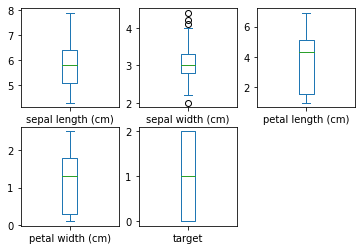

In [19]:
print('Box Plot - Distribution of attribute through their quartiles & find outlier')
df.plot(kind = 'box', subplots = True, layout = (2, 3), sharex = False, sharey = False)
plt.show()

Violinplot - Density of the length and width in the species


<Figure size 1080x720 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:xlabel='target', ylabel='petal length (cm)'>

<AxesSubplot:>

<AxesSubplot:xlabel='target', ylabel='petal width (cm)'>

<AxesSubplot:>

<AxesSubplot:xlabel='target', ylabel='sepal width (cm)'>

<AxesSubplot:>

<AxesSubplot:xlabel='target', ylabel='sepal length (cm)'>

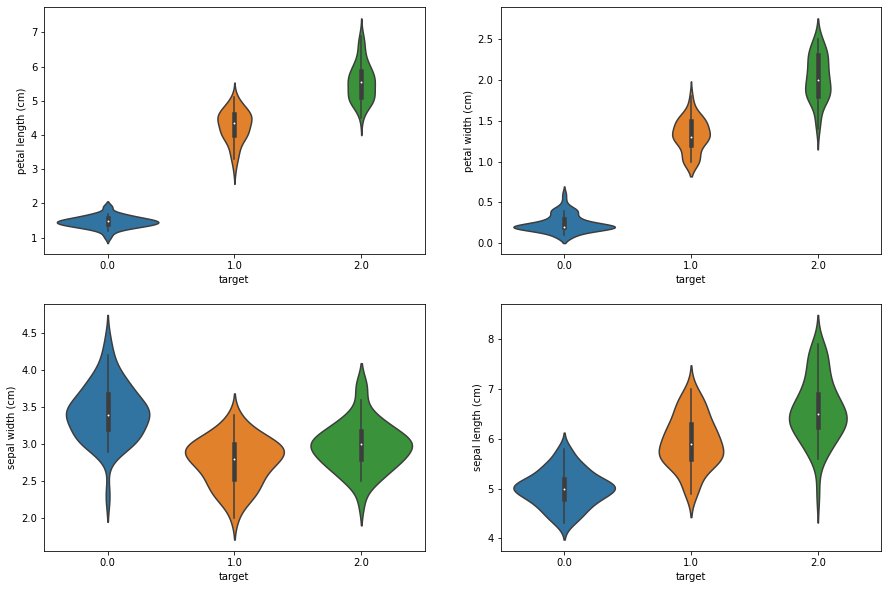

In [20]:
print('Violinplot - Density of the length and width in the species')

plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sb.violinplot(x='target',y='petal length (cm)',data=df)
plt.subplot(2,2,2)
sb.violinplot(x='target',y='petal width (cm)',data=df)
plt.subplot(2,2,3)
sb.violinplot(x='target',y='sepal width (cm)',data=df)
plt.subplot(2,2,4)
sb.violinplot(x='target',y='sepal length (cm)',data=df)
plt.show()


# Regresssion

In [22]:
X = iris.data[:] # we only take the first two features.
y = iris.target

X.shape
y.shape

(150, 4)

(150,)

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

X_train.shape
X_test.shape

(100, 4)

(50, 4)

In [24]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)

y_pred = reg.predict(X_test)

In [25]:
from sklearn.metrics import mean_squared_error, r2_score

# The coefficients
print('Intercept:', reg.intercept_)
print('Coefficients:', reg.coef_)

# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination R^2: %.2f' % r2_score(y_test, y_pred))

print('Score', reg.score(X_train, y_train))

Intercept: 0.13372618061633046
Coefficients: [-0.07741196 -0.07436058  0.22180689  0.59385479]
Mean squared error: 0.04
Coefficient of determination R^2: 0.94
Score 0.9249758241550513


# Classifier
## RandomForest Classifier

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)


#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

# prediction on test set
y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination R^2: %.2f' % r2_score(y_test, y_pred))

RandomForestClassifier()

Accuracy: 0.98
Mean squared error: 0.02
Coefficient of determination R^2: 0.97


# PCA vs LDA

    Principal Component Analysis (PCA) applied to this data identifies the combination of attributes (principal components, or directions in the feature space) that account for the most variance in the data. Here we plot the different samples on the 2 first principal components.

    Linear Discriminant Analysis (LDA) tries to identify attributes that account for the most variance between classes. In particular, LDA, in contrast to PCA, is a supervised method, using known class labels.

In [27]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [28]:

X = iris.data
y = iris.target
target_names = iris.target_names

In [29]:
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

In [30]:
lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

In [31]:
# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s' % str(pca.explained_variance_ratio_))

explained variance ratio (first two components): [0.92461872 0.05306648]


<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'PCA of IRIS dataset')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'LDA of IRIS dataset')

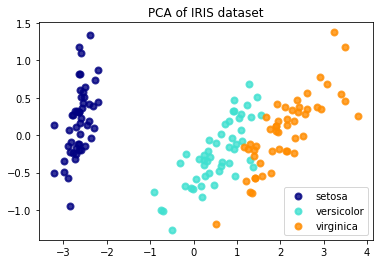

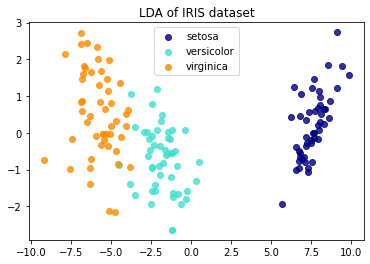

In [32]:
plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')

plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], alpha=.8, color=color,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of IRIS dataset')

plt.show()

## SVM classifiers
    The linear models LinearSVC() and SVC(kernel='linear') yield slightly different decision boundaries. This can be a consequence of the following differences:

    LinearSVC minimizes the squared hinge loss while SVC minimizes the regular hinge loss.

    LinearSVC uses the One-vs-All (also known as One-vs-Rest) multiclass reduction while SVC uses the One-vs-One multiclass reduction.

    Both linear models have linear decision boundaries (intersecting hyperplanes) while the non-linear kernel models (polynomial or Gaussian RBF) have more flexible non-linear decision boundaries with shapes that depend on the kind of kernel and its parameters.

In [33]:
from sklearn import svm

X = iris.data[:, :2]
y = iris.target

In [34]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


In [35]:
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C, max_iter=10000),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, gamma='auto', C=C))
models = (clf.fit(X, y) for clf in models)

(3.3, 8.880000000000006)

(1.0, 5.380000000000004)

Text(0.5, 0, 'Sepal length')

Text(0, 0.5, 'Sepal width')

[]

[]

Text(0.5, 1.0, 'SVC with linear kernel')

(3.3, 8.880000000000006)

(1.0, 5.380000000000004)

Text(0.5, 0, 'Sepal length')

Text(0, 0.5, 'Sepal width')

[]

[]

Text(0.5, 1.0, 'LinearSVC (linear kernel)')

(3.3, 8.880000000000006)

(1.0, 5.380000000000004)

Text(0.5, 0, 'Sepal length')

Text(0, 0.5, 'Sepal width')

[]

[]

Text(0.5, 1.0, 'SVC with RBF kernel')

(3.3, 8.880000000000006)

(1.0, 5.380000000000004)

Text(0.5, 0, 'Sepal length')

Text(0, 0.5, 'Sepal width')

[]

[]

Text(0.5, 1.0, 'SVC with polynomial (degree 3) kernel')

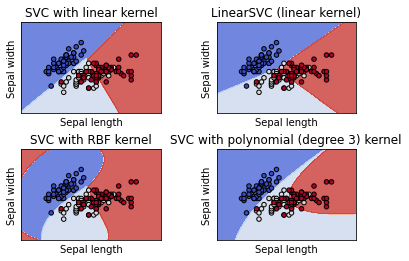

In [36]:
# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

# TensorFlow Deep Learning Model 

In [37]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
#
# Import TF modules
#
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical

In [38]:

#
# Create the network
#
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(4,)))
network.add(layers.Dense(3, activation='softmax'))
#
# Compile the network
#
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
#
# Load the iris dataset
#
iris = datasets.load_iris()
X = iris.data
y = iris.target
#
# Create training and test split
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
#
# Create categorical labels
#
train_labels = to_categorical(y_train)
test_labels = to_categorical(y_test)
epochs = 100
#
# Fit the neural network
#
seqModel = network.fit(X_train, train_labels, epochs=epochs, batch_size=40, verbose=False)

network.summary()

2021-09-28 16:32:34.760221: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-09-28 16:32:34.845172: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               2560      
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 1539      
Total params: 4,099
Trainable params: 4,099
Non-trainable params: 0
_________________________________________________________________


In [39]:
seqModel.history.keys()

dict_keys(['loss', 'accuracy'])

<Figure size 432x288 with 0 Axes>

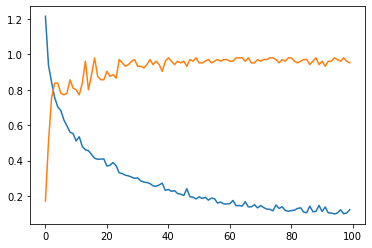

In [40]:

# visualizing losses and accuracy
train_loss = seqModel.history['loss']
train_acc  = seqModel.history['accuracy']
xc         = range(epochs)

plt.figure()
plt.plot(xc, train_loss)
plt.plot(xc, train_acc)

In [41]:
loss, accuracy = network.evaluate(X_test, test_labels, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)


Test loss: 0.10910913348197937
Test accuracy: 1.0


In [42]:
network.save('./models/iris.h5')
